# Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style = "white", color_codes = True)
import warnings 
warnings.filterwarnings("ignore")

# Load Data

In [2]:
honey = pd.read_csv(r"C:\Users\PC\OneDrive - Universiti Malaya\Desktop\Data Science Project\FP035-2021.csv")

### Summary of dataset

In [3]:
honey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   No                                  158 non-null    int64  
 1   Sample                              158 non-null    object 
 2   PH                                  158 non-null    float64
 3   TPC (µg GAE/mg honey)               158 non-null    float64
 4   TFC (µg QE/mg honey)                158 non-null    float64
 5   ABTS (% inhibition)                 158 non-null    float64
 6   FRAP (µg FeSO4/mg honey)            158 non-null    float64
 7   Water content (% weight/weight)     158 non-null    object 
 8   Fructose content (% weight/weight)  158 non-null    float64
 9   Glucose content (% weight/weight)   158 non-null    float64
 10  Remark                              41 non-null     object 
dtypes: float64(7), int64(1), object(3)
memory usa

There are a total of 158 rows and 10 colums altogether. In addition, we can see that there are no null-values in the dataset. 

# Data Preprocessing

### Renaming Columns for better understanding

No : Sample_ID

Sample : Sample_Name 

TPC (µg GAE/mg honey) : TPC #referring to Total Phenolic Content

TFC (µg QE/mg honey) : TFC #referring to Total Flavonoid Content

ABTS (% inhibition) : ABTS

FRAP (µg FeSO4/mg honey) : FRAP

Water Content (% weight/weight) : Water

Fructose Content (% weight/weight) : Fructose

Glucose Content (% weight/weight) : Glucose


In [4]:
honey=honey.rename(columns={"No" : "Sample_ID", "Sample" : "Sample_Name", "TPC (µg GAE/mg honey)" : "TPC" , "TFC (µg QE/mg honey)" : "TFC", "ABTS (% inhibition)" : "ABTS" , "FRAP (µg FeSO4/mg honey)" : "FRAP" , "Water content (% weight/weight)" : "Water" , "Fructose content (% weight/weight)" : "Fructose", "Glucose content (% weight/weight)" : "Glucose"})
honey.head()

,Sample_ID,Sample_Name,PH,TPC,TFC,ABTS,FRAP,Water,Fructose,Glucose,Remark
0,1,A itama i,3.1,147.11,40.43,12.43,7.62,29.1,71.2,70.9,NaN
1,2,A itama ii,3.1,158.81,43.36,15.31,11.41,29.8,70.5,70.2,NaN
2,3,A itama iii,3.0,152.83,44.57,15.21,14.63,30.5,69.7,69.4,NaN
3,4,A itama iv,3.2,203.06,43.97,20.40,20.21,28.8,71.5,71.3,NaN
4,5,A itama v,3.3,178.09,44.59,17.50,16.19,26.1,74.3,74.1,NaN


### Removing unnecessary columns

In [5]:
honey=honey.drop(columns={"Remark","Sample_ID"})
honey.head()

,Sample_Name,PH,TPC,TFC,ABTS,FRAP,Water,Fructose,Glucose
0,A itama i,3.1,147.11,40.43,12.43,7.62,29.1,71.2,70.9
1,A itama ii,3.1,158.81,43.36,15.31,11.41,29.8,70.5,70.2
2,A itama iii,3.0,152.83,44.57,15.21,14.63,30.5,69.7,69.4
3,A itama iv,3.2,203.06,43.97,20.40,20.21,28.8,71.5,71.3
4,A itama v,3.3,178.09,44.59,17.50,16.19,26.1,74.3,74.1


### Separate sample extract location (State Code) from Sample_Name

Since in each Sample_Name there is a sate code atssociated with it, referring to the place of honey extraction. This information could be transferred to another column as State.

In [6]:
honey[["State" , "Sample_Name"]] = honey.Sample_Name.str.split(" ", 1, expand=True,)
honey.head()

,Sample_Name,PH,TPC,TFC,ABTS,FRAP,Water,Fructose,Glucose,State
0,itama i,3.1,147.11,40.43,12.43,7.62,29.1,71.2,70.9,A
1,itama ii,3.1,158.81,43.36,15.31,11.41,29.8,70.5,70.2,A
2,itama iii,3.0,152.83,44.57,15.21,14.63,30.5,69.7,69.4,A
3,itama iv,3.2,203.06,43.97,20.40,20.21,28.8,71.5,71.3,A
4,itama v,3.3,178.09,44.59,17.50,16.19,26.1,74.3,74.1,A


### Change the value of state codes to real state names

State Codes to State Names respectively are as below :-

A = Kedah	

B = Kedah 

C = Kedah	

D = Selangor

E = Selangor

F = Johor 	

G = Johor 

H = Johor 

I = Pahang 	

J = Pahang 	

K = Terengganu 	

L = Terengganu 

In [7]:
honey["State"] = honey["State"].replace(["A","B","C"], "Kedah")
honey["State"] = honey["State"].replace(["D","E"], "Selangor")
honey["State"] = honey["State"].replace(["F","G","H"], "Johor")
honey["State"] = honey["State"].replace(["I","J"], "Pahang")
honey["State"] = honey["State"].replace(["K","L"], "Terengganu")
honey.head()

,Sample_Name,PH,TPC,TFC,ABTS,FRAP,Water,Fructose,Glucose,State
0,itama i,3.1,147.11,40.43,12.43,7.62,29.1,71.2,70.9,Kedah
1,itama ii,3.1,158.81,43.36,15.31,11.41,29.8,70.5,70.2,Kedah
2,itama iii,3.0,152.83,44.57,15.21,14.63,30.5,69.7,69.4,Kedah
3,itama iv,3.2,203.06,43.97,20.40,20.21,28.8,71.5,71.3,Kedah
4,itama v,3.3,178.09,44.59,17.50,16.19,26.1,74.3,74.1,Kedah


For this project, we only want to know how the physicochemical properties and antioxidant properties in honey affect the identification of stingless bee species. Hence, 'State' attribute is not necessary and should be removed.

In [8]:
honey=honey.drop(columns = "State")

### Remove unnecessary species iteration

In [9]:
honey[["Sample_Name", "Iteration"]] = honey.Sample_Name.str.split(" ", 1, expand = True)
honey = honey.drop(columns = "Iteration")
honey.rename(columns={"Sample_Name":"Species"}, inplace = True)
honey.head()

,Species,PH,TPC,TFC,ABTS,FRAP,Water,Fructose,Glucose
0,itama,3.1,147.11,40.43,12.43,7.62,29.1,71.2,70.9
1,itama,3.1,158.81,43.36,15.31,11.41,29.8,70.5,70.2
2,itama,3.0,152.83,44.57,15.21,14.63,30.5,69.7,69.4
3,itama,3.2,203.06,43.97,20.40,20.21,28.8,71.5,71.3
4,itama,3.3,178.09,44.59,17.50,16.19,26.1,74.3,74.1


### Observe and change datatype if necessary

In [10]:
honey.dtypes

Species      object
PH          float64
TPC         float64
TFC         float64
ABTS        float64
FRAP        float64
Water        object
Fructose    float64
Glucose     float64
dtype: object

It is observed that the attribute 'Water' is in object datatype which is considered a string. This seems off since water content should be in numerical value. We need to check the values of said column. 

In [11]:
honey_water = honey.sort_values(by=["Water"], ascending = False)
print(honey_water.Water)

59      OOR
84      OOR
129     OOR
128     OOR
126     OOR
       ... 
113    25.4
115    25.3
19     25.2
114    25.1
117    25.1
Name: Water, Length: 158, dtype: object


After sorting the column 'Water' in descending order, we found out that there are multiple rows which have the value of 'OOR'.

In the remark column that we removed previously, it is stated that 'OOR' stands for 'Out Of Range'. This means that there are multiple samples which water content of 10-30. Hence, the value of 'OOR' can be considered as missing values. 

In [12]:
(honey["Water"]=="OOR").sum()

43

There are 43 rows with the value of "OOR" for the water content attribute. The best practice is to drop a specific column when 70% of the rows are missing values. In this case, only 27% of records in the "Water" attribute are missing values therefore, the column should not be removed or dropped.  

### Replacing Missing Values

To solve this problem, we should change the value of 'OOR' to the mean of column.

In [13]:
# honey["Water"]=honey["Water"].replace({"OOR":"1"}, inplace = True)
honey = honey.replace("OOR", "0.0")
honey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   158 non-null    object 
 1   PH        158 non-null    float64
 2   TPC       158 non-null    float64
 3   TFC       158 non-null    float64
 4   ABTS      158 non-null    float64
 5   FRAP      158 non-null    float64
 6   Water     158 non-null    object 
 7   Fructose  158 non-null    float64
 8   Glucose   158 non-null    float64
dtypes: float64(7), object(2)
memory usage: 11.2+ KB


In [14]:
print(honey)

    Species   PH     TPC    TFC   ABTS   FRAP Water  Fructose  Glucose
0     itama  3.1  147.11  40.43  12.43   7.62  29.1      71.2     70.9
1     itama  3.1  158.81  43.36  15.31  11.41  29.8      70.5     70.2
2     itama  3.0  152.83  44.57  15.21  14.63  30.5      69.7     69.4
3     itama  3.2  203.06  43.97  20.40  20.21  28.8      71.5     71.3
4     itama  3.3  178.09  44.59  17.50  16.19  26.1      74.3     74.1
..      ...  ...     ...    ...    ...    ...   ...       ...      ...
153   itama  3.0  191.21  73.10  21.42  56.82    28      72.3     72.1
154   itama  3.2  158.25  58.72  19.49  45.48  29.5      70.7     70.5
155   itama  3.1  147.51  58.73  19.29  47.76  30.2      70.0     69.9
156   itama  2.8  166.07  79.35  16.17  46.71  29.1      71.1     70.9
157   itama  3.3  256.84  85.07  20.58  58.03  28.7      71.6     71.4

[158 rows x 9 columns]


In [15]:
convert_dict = {"Water" : float}
honey = honey.astype(convert_dict)
honey.dtypes

Species      object
PH          float64
TPC         float64
TFC         float64
ABTS        float64
FRAP        float64
Water       float64
Fructose    float64
Glucose     float64
dtype: object

In [16]:
mean = honey["Water"].mean()
honey["Water"] = honey["Water"].replace(0.0, mean)
honey["Water"] = honey["Water"].round(2)

### Randomize the dataset

This is to avoid bias when splitting the data into training and testing sets.

In [17]:
honey = honey.sample(frac=1)
honey.head()

,Species,PH,TPC,TFC,ABTS,FRAP,Water,Fructose,Glucose
33,apicalis,3.0,325.54,77.79,29.06,54.00,31.40,68.7,68.5
137,apicalis,2.7,151.98,49.06,14.00,45.94,21.38,60.5,60.3
90,apicalis,2.9,193.26,54.62,15.37,36.12,21.38,60.7,60.5
79,thoracica,3.4,298.98,66.55,48.87,78.47,29.10,71.2,71.0
86,thoracica,3.1,290.41,73.43,58.69,91.83,30.90,69.3,69.1


# Exploratory Data Analysis

### Scatter plot

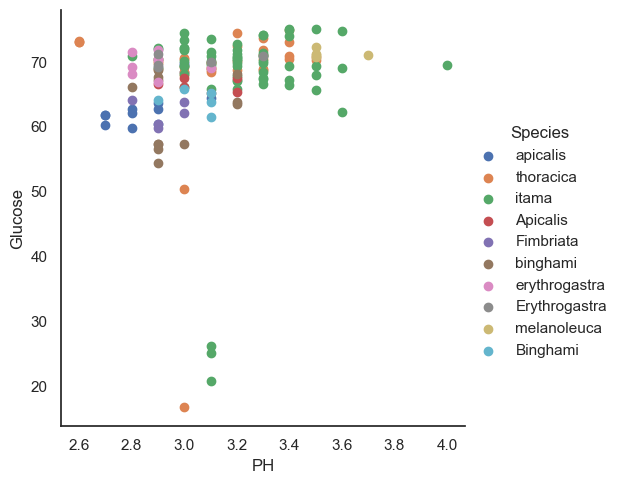

In [18]:
sns.FacetGrid(honey, hue="Species", size = 5).map(plt.scatter, "PH", "Glucose").add_legend()

As we can see there are 2 species with the same name which are "binghami" and "Binghami". This is redundant because those 2 are the same species, which are separated due to capitalization of the first letter. Some data processing are needed.

In [19]:
honey.Species = honey.Species.str.capitalize()

lets rerun the previous scatterplot

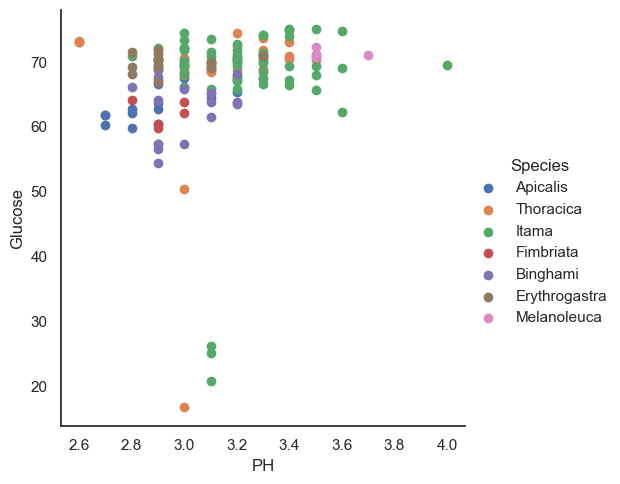

In [20]:
sns.FacetGrid(honey, hue="Species", size = 5).map(plt.scatter, "PH", "Glucose").add_legend()
plt.show()

As we can see, all the species name is standardize with the capitalization of first letter for every species

### Boxplot

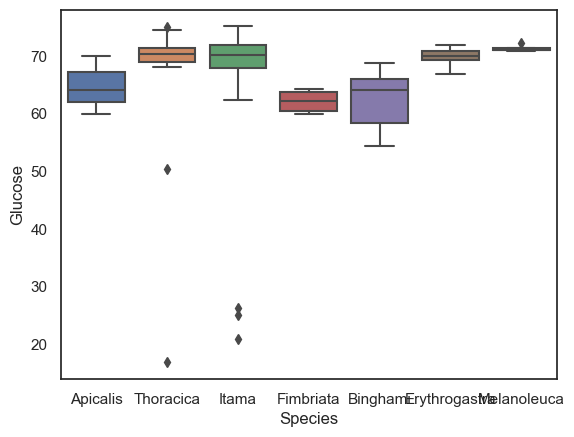

In [21]:
sns.boxplot(x="Species", y="Glucose", data=honey)
plt.show()

As we can see there are a few outliers exist in the dataset, specifically in the attribute / column of Glucose content

### Pairplot

Show the relationship between all variables

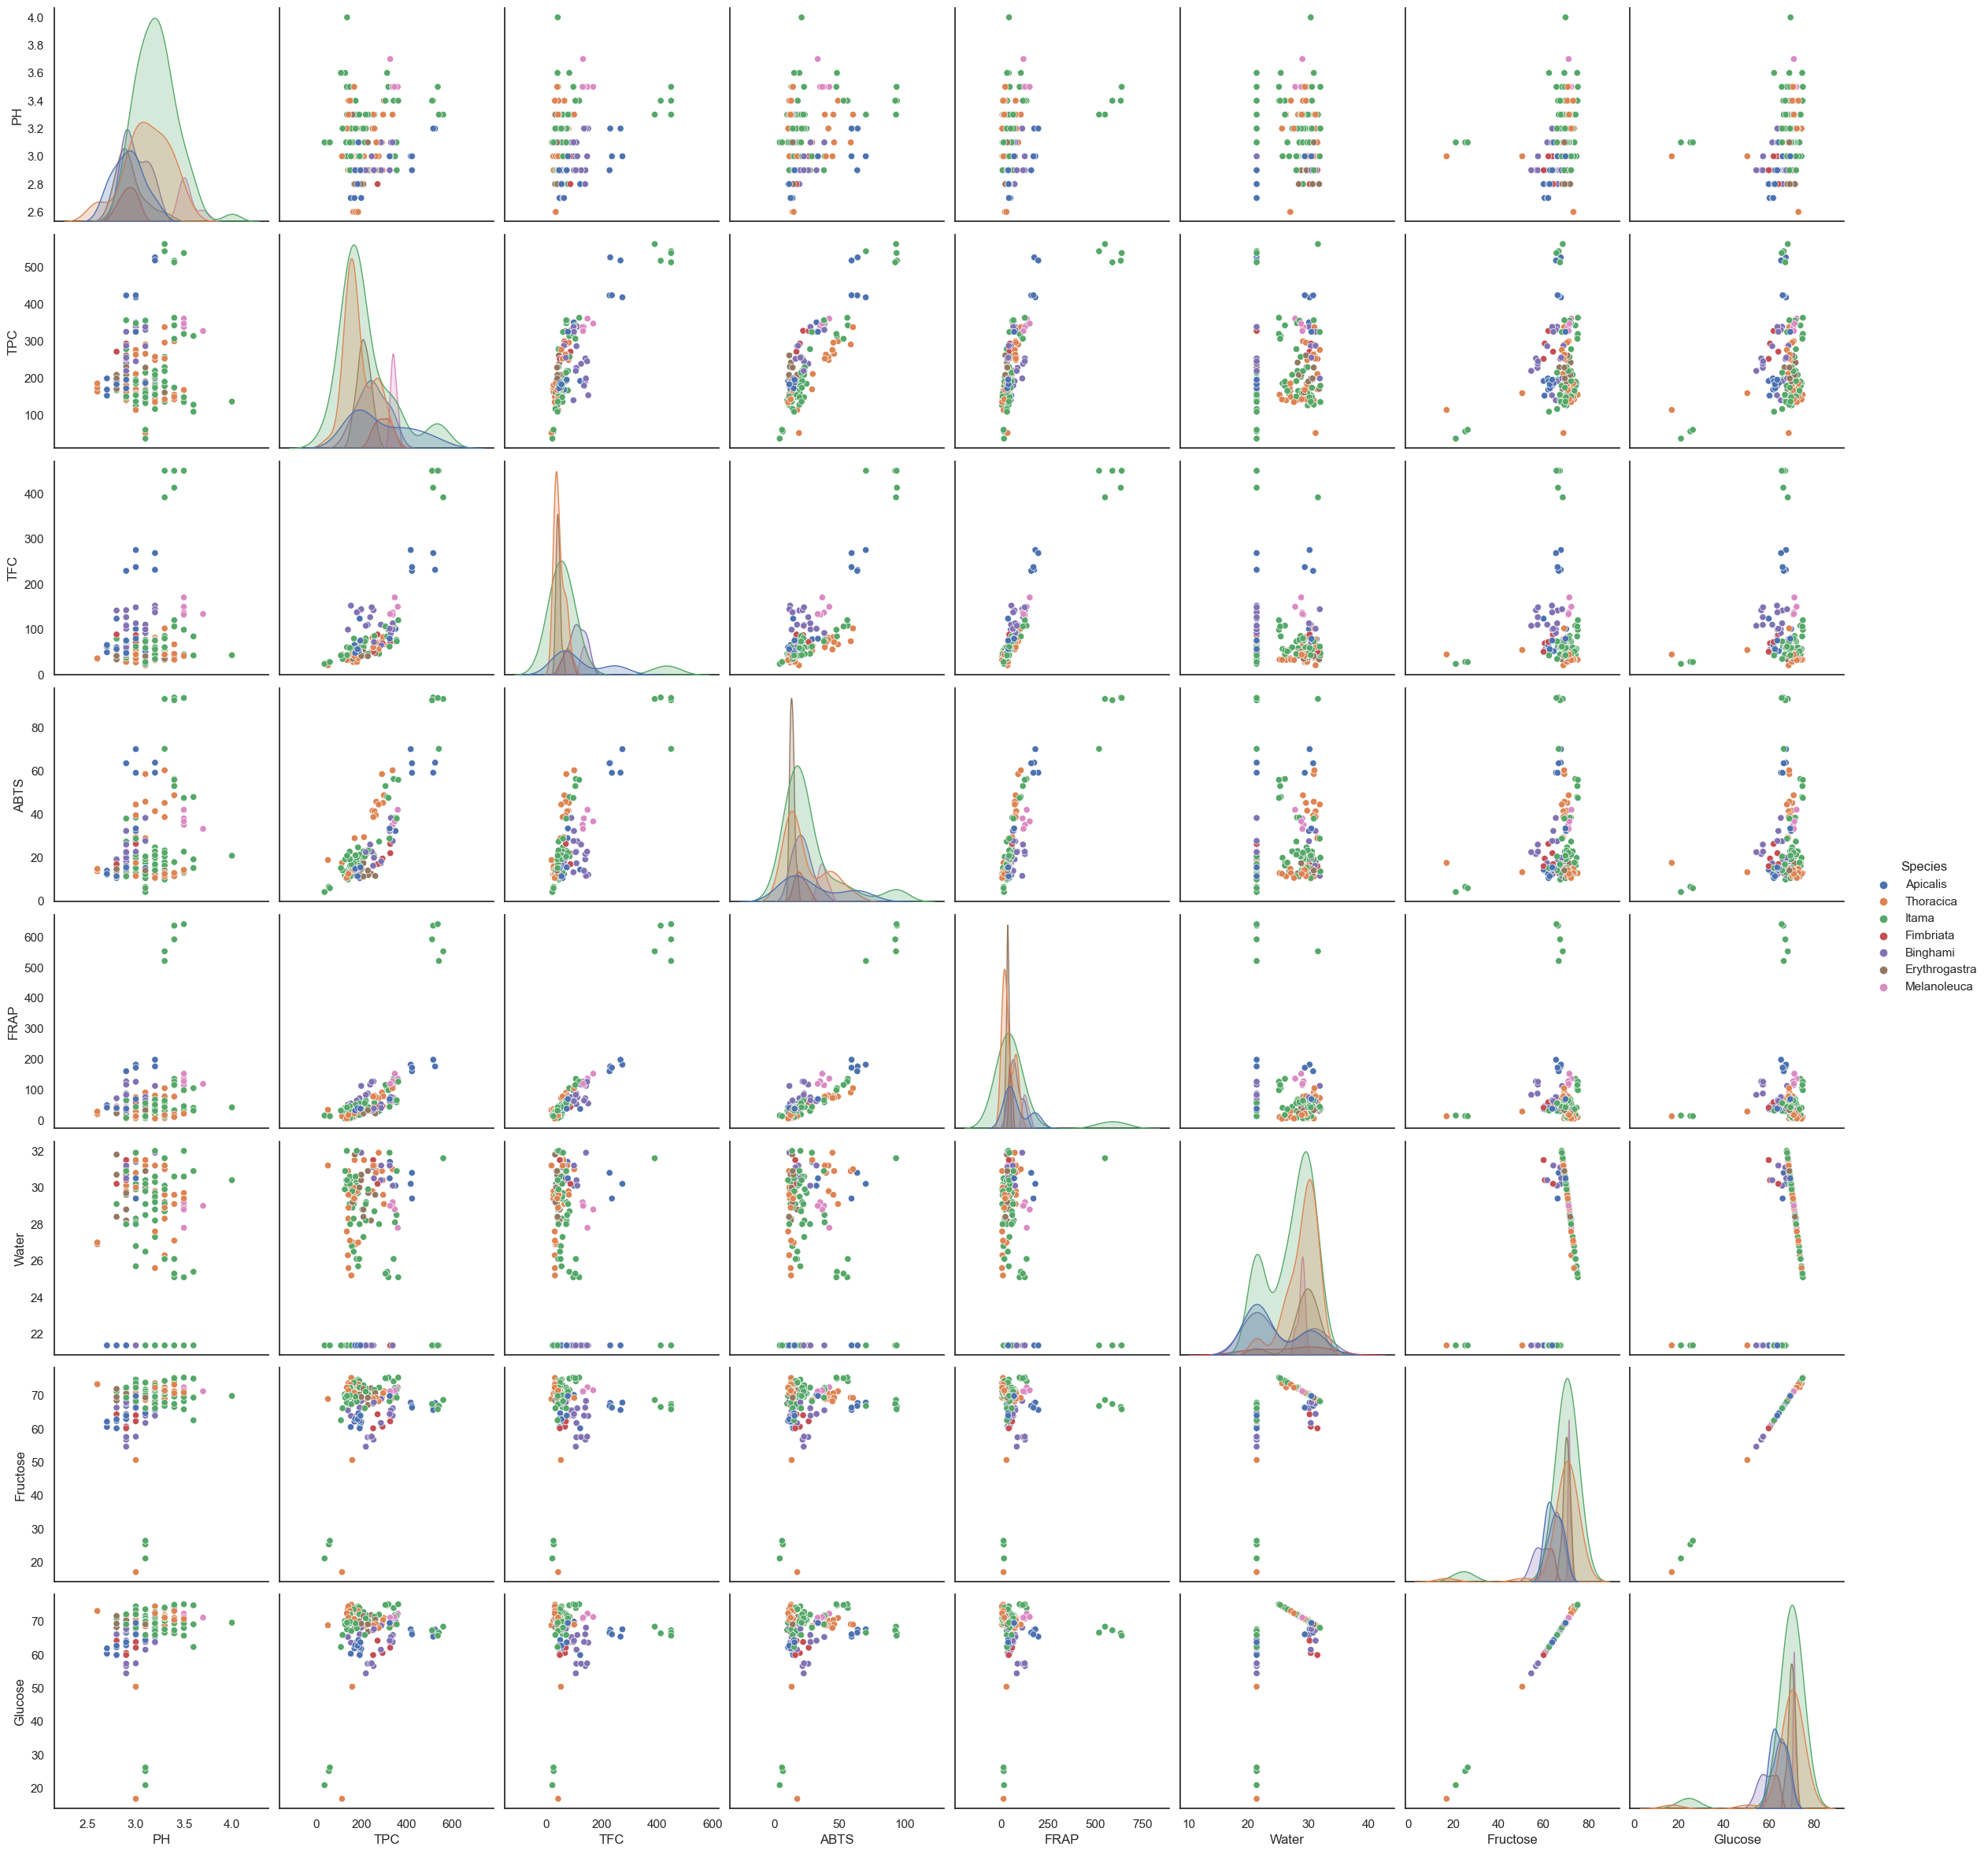

In [22]:
sns.pairplot(honey, hue="Species", size=3)
plt.show()

### Kernel Density Plot

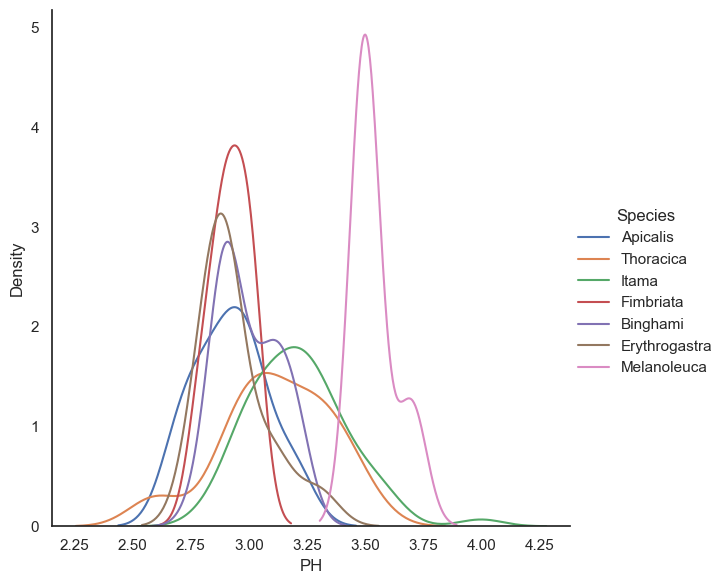

In [23]:
sns.FacetGrid(honey, hue="Species", size=6).map(sns.kdeplot, "PH").add_legend()
plt.show()

### Multivariate Visualization with parallel coordinates

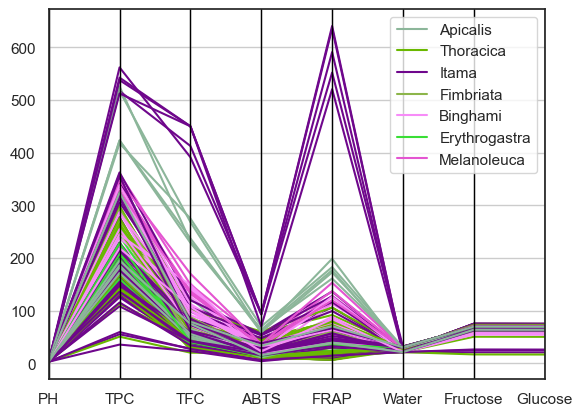

In [24]:
from pandas.plotting import parallel_coordinates
parallel_coordinates(honey, "Species")
plt.show()

# Model Development

In [25]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [26]:
# Separating the data into dependatn and independant variables
X = honey.iloc[:, 1:]
y = honey.iloc[:, 0]

# Splitting the dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# predict
y_pred = classifier.predict(X_test)

# Summary 
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Accuracy score
from sklearn.metrics import accuracy_score
print("accuracy is", accuracy_score(y_pred, y_test))

               precision    recall  f1-score   support

     Apicalis       0.75      0.60      0.67         5
     Binghami       1.00      1.00      1.00         1
Erythrogastra       1.00      0.67      0.80         3
    Fimbriata       1.00      1.00      1.00         1
        Itama       0.53      0.62      0.57        13
  Melanoleuca       0.00      0.00      0.00         0
    Thoracica       0.38      0.33      0.35         9

     accuracy                           0.56        32
    macro avg       0.67      0.60      0.63        32
 weighted avg       0.60      0.56      0.57        32

[[3 0 0 0 2 0 0]
 [0 1 0 0 0 0 0]
 [0 0 2 0 0 0 1]
 [0 0 0 1 0 0 0]
 [1 0 0 0 8 0 4]
 [0 0 0 0 0 0 0]
 [0 0 0 0 5 1 3]]
accuracy is 0.5625


### K-Nearest Neighbors

The highest accuracy we can get is when K = 11

In [28]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=11)
classifier.fit(X_train, y_train)

# predict
y_pred = classifier.predict(X_test)

# Summary 
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Accuracy score
from sklearn.metrics import accuracy_score
print("accuracy is", accuracy_score(y_pred, y_test))

               precision    recall  f1-score   support

     Apicalis       1.00      0.20      0.33         5
     Binghami       0.33      1.00      0.50         1
Erythrogastra       1.00      0.67      0.80         3
    Fimbriata       1.00      1.00      1.00         1
        Itama       0.56      0.69      0.62        13
  Melanoleuca       0.00      0.00      0.00         0
    Thoracica       0.67      0.44      0.53         9

     accuracy                           0.56        32
    macro avg       0.65      0.57      0.54        32
 weighted avg       0.71      0.56      0.58        32

[[1 1 0 0 1 2 0]
 [0 1 0 0 0 0 0]
 [0 0 2 0 1 0 0]
 [0 0 0 1 0 0 0]
 [0 1 0 0 9 1 2]
 [0 0 0 0 0 0 0]
 [0 0 0 0 5 0 4]]
accuracy is 0.5625


### Support Vector Machine

In [29]:
from sklearn.svm import SVC

classifier = SVC()
classifier.fit(X_train, y_train)

# Predict
y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

               precision    recall  f1-score   support

     Apicalis       1.00      0.40      0.57         5
     Binghami       0.00      0.00      0.00         1
Erythrogastra       0.00      0.00      0.00         3
    Fimbriata       0.00      0.00      0.00         1
        Itama       0.43      1.00      0.60        13
    Thoracica       0.00      0.00      0.00         9

     accuracy                           0.47        32
    macro avg       0.24      0.23      0.20        32
 weighted avg       0.33      0.47      0.33        32

[[ 2  0  0  0  3  0]
 [ 0  0  0  0  1  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  1  0]
 [ 0  0  0  0 13  0]
 [ 0  0  0  0  9  0]]
accuracy is 0.46875


### Decision Trees

In [30]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

# Predict
y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

               precision    recall  f1-score   support

     Apicalis       0.33      0.40      0.36         5
     Binghami       1.00      1.00      1.00         1
Erythrogastra       1.00      0.33      0.50         3
    Fimbriata       1.00      1.00      1.00         1
        Itama       0.62      0.62      0.62        13
  Melanoleuca       0.00      0.00      0.00         0
    Thoracica       0.44      0.44      0.44         9

     accuracy                           0.53        32
    macro avg       0.63      0.54      0.56        32
 weighted avg       0.58      0.53      0.54        32

[[2 0 0 0 1 0 2]
 [0 1 0 0 0 0 0]
 [0 0 1 0 1 0 1]
 [0 0 0 1 0 0 0]
 [2 0 0 0 8 1 2]
 [0 0 0 0 0 0 0]
 [2 0 0 0 3 0 4]]
accuracy is 0.53125


### Naive Bayes Classifier

In [31]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Predict
y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

               precision    recall  f1-score   support

     Apicalis       1.00      0.60      0.75         5
     Binghami       0.33      1.00      0.50         1
Erythrogastra       0.67      0.67      0.67         3
    Fimbriata       1.00      1.00      1.00         1
        Itama       0.60      0.23      0.33        13
    Thoracica       0.35      0.67      0.46         9

     accuracy                           0.50        32
    macro avg       0.66      0.69      0.62        32
 weighted avg       0.60      0.50      0.49        32

[[ 3  2  0  0  0  0]
 [ 0  1  0  0  0  0]
 [ 0  0  2  0  0  1]
 [ 0  0  0  1  0  0]
 [ 0  0  0  0  3 10]
 [ 0  0  1  0  2  6]]
accuracy is 0.5


### Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators = 100)
classifier.fit(X_train, y_train)

# Predict
y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

               precision    recall  f1-score   support

     Apicalis       1.00      0.80      0.89         5
     Binghami       1.00      1.00      1.00         1
Erythrogastra       1.00      0.67      0.80         3
    Fimbriata       1.00      1.00      1.00         1
        Itama       0.71      0.92      0.80        13
    Thoracica       0.71      0.56      0.63         9

     accuracy                           0.78        32
    macro avg       0.90      0.82      0.85        32
 weighted avg       0.80      0.78      0.78        32

[[ 4  0  0  0  1  0]
 [ 0  1  0  0  0  0]
 [ 0  0  2  0  0  1]
 [ 0  0  0  1  0  0]
 [ 0  0  0  0 12  1]
 [ 0  0  0  0  4  5]]
accuracy is 0.78125


In [33]:
from sklearn.metrics import accuracy_score, log_loss
classifiers = [
    GaussianNB(),
    KNeighborsClassifier(),
    LogisticRegression(),
    DecisionTreeClassifier(),
    SVC(),
    RandomForestClassifier()
                  ]
 
# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)
 
for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    log_entry = pd.DataFrame([[name, acc*100, 11]], columns=log_cols)
    log = log.append(log_entry)
    
    print("="*30)

GaussianNB
****Results****
Accuracy: 50.0000%
KNeighborsClassifier
****Results****
Accuracy: 62.5000%
LogisticRegression
****Results****
Accuracy: 56.2500%
DecisionTreeClassifier
****Results****
Accuracy: 50.0000%
SVC
****Results****
Accuracy: 46.8750%
RandomForestClassifier
****Results****
Accuracy: 78.1250%


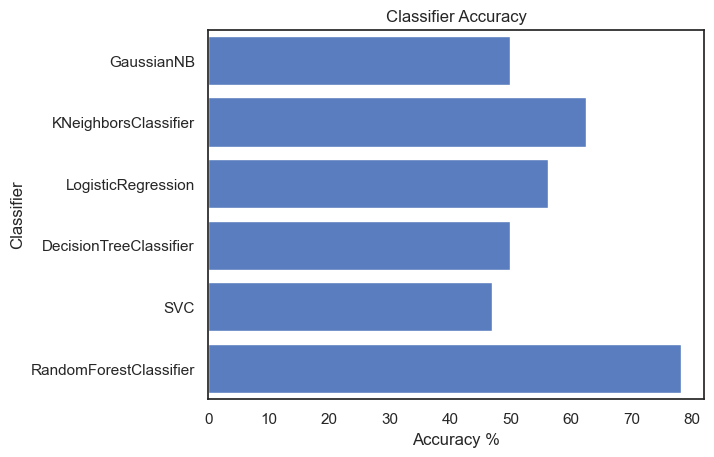

In [34]:
sns.set_color_codes("muted")
sns.barplot(x="Accuracy", y="Classifier", data=log, color="b")

plt.xlabel("Accuracy %")
plt.title("Classifier Accuracy")
plt.show()

We can see that Random Forest classifier have the highest accuracy compared to the other models. Hence, Random Forest will be chosen as the best model. 

### Save model in pickle file for deployment

In [35]:
import pickle

In [36]:
# save the fitted model
with open("RandomForest.pkl", "wb") as f:
    pickle.dump(classifier, f)  

# load
with open("RandomForest.pkl",  "rb") as f:
    classifier = pickle.load(f)

Find the minimum and maximum value of each columns for the purpose of sliders in GUI Development

In [37]:
PH = {honey["PH"].min(), honey["PH"].max()}
TPC = {honey["TPC"].min(), honey["TPC"].max()}
TFC = {honey["TFC"].min(), honey["TFC"].max()}
ABTS = {honey["ABTS"].min(), honey["ABTS"].max()}
FRAPS = {honey["FRAP"].min(), honey["FRAP"].max()} 
Water = {honey["Water"].min(), honey["Water"].max()}
Fructose = {honey["Fructose"].min(), honey["Fructose"].max()}
Glucose = {honey["Glucose"].min(), honey["Glucose"].max()}

PH, TPC, TFC, ABTS, FRAPS, Water, Fructose, Glucose

({2.6, 4.0},
 {35.68, 562.06},
 {20.3, 450.29},
 {4.15, 94.09},
 {6.43, 640.69},
 {21.38, 32.0},
 {17.0, 75.3},
 {16.8, 75.1})

# GUI Development (Model Deployment)

For deploying the model, Gradio is chosen because it allows us  to create demos of our machine learning model. It is easy to implement with supportive libraries.

In [38]:
pip install gradio

Note: you may need to restart the kernel to use updated packages.


In [149]:
import gradio as gr

Itama_desc = "Honey from H.itama can reverse the weight gained from a high-fat diet. In addition, it can significally reduce BMI, adiposity index, and relative organ weight"
Adultered_desc = "Molasses is one of the major adulterants found in adultered honeys. Adultered bee honey might be dangerous"

# bee = gr.Image(value = "https://drive.google.com/file/d/1_Z1ez9LIfIYZPCCjb7BpH1-pLtrdaTbV/view?usp=sharing")

def make_prediction(PH, TPC, TFC, ABTS, FRAP, Water, Fructose, Glucose, molasses):
    if molasses == True: 
        return "Oh no! This honey is adultered!", Adultered_desc
    with open("RandomForest.pkl", "rb") as f:
        classifier = pickle.load(f)
        preds = classifier.predict([[PH, TPC, TFC, ABTS, FRAP, Water, Fructose, Glucose]])
    if preds == "Itama":
        return "This honey is from the Itama species", Itama_desc
    elif preds == "Apicalis":
        return "This honey is from the Apicalis species" ,sample
    elif preds == "Erythrogastra":
        return "This honey is from  the Erythrogastra species",sample
    elif preds == "Binghami":
        return "This honey is from the Binghami species",sample
    elif preds == "Thoracica":
        return "This honey is from the Thoracica species",sample
    elif preds == "Fimbriata":
        return "This honey is from the Fimbriata species",sample
    return "This honey is from the Melanoleuca species",sample

PH_input = gr.Slider(2.6, 4.0, label = "pH value", value=round(honey["PH"].mean(),2))
TPC_input = gr.Slider(35.68, 562.06, label = "Total Phenolic Content, TPC", value=round(honey["TPC"].mean(),2))
TFC_input = gr.Slider(20.3, 450.29, label = "Total Flavonoid Content, TFC", value=round(honey["TFC"].mean(),2))
ABTS_input = gr.Slider(4.15, 94.09, value=round(honey["ABTS"].mean(),2))
FRAP_input = gr.Slider(6.43, 640.69, value=round(honey["FRAP"].mean(),2))
Water_input = gr.Slider(21.38, 32.0, label = "Water Content", value=round(honey["Water"].mean(),2))
Fructose_input = gr.Slider(17.0, 75.3, label = "Fructose Content", value=round(honey["Fructose"].mean(),2))
Glucose_input = gr.Slider(16.8, 75.1, label = "Glucose Content", value=round(honey["Glucose"].mean(),2))
Contain_molasses = gr.Checkbox(label = "Does it contain Molasses?")

reference = gr.Textbox(label = "Honey Description")

app = gr.Interface(fn=make_prediction, 
                   inputs=[PH_input, TPC_input, TFC_input, ABTS_input, FRAP_input, Water_input, Fructose_input, Glucose_input, Contain_molasses], 
                   outputs= [gr.Label(label="Result"), reference], 
                   examples = [[2.6, 35.68, 20.3, 4.15, 6.43, 21.38, 17.0, 16.8],
                               [4.0, 562.06, 450.29, 94.09, 640.69, 32.0, 75.3, 75.1],
                               [3.3, 139.3, 32.26, 11.42, 8.2, 26.3, 72.4, 73.7]],
                   live=True, 
                   title="Stingless Bee Honey Classifier", 
                   description="Utilize this classifier to determine which species of stingless bee is your honey from! \n Note that if you do not know the value of a specific component/attribute, just leave it as it is. The default value corresponds to the mean of the attribute."
                  )
# app.launch(share = True, auth = ("admin", "admin"), auth_message = "Please ask admin(Muhammad Zariff Wafiy)'s permission to access classifier.")
app.launch()

Running on local URL:  http://127.0.0.1:7947

To create a public link, set `share=True` in `launch()`.


Traceback (most recent call last):
  File "C:\Users\PC\anaconda3\lib\site-packages\gradio\routes.py", line 321, in run_predict
    output = await app.blocks.process_api(
  File "C:\Users\PC\anaconda3\lib\site-packages\gradio\blocks.py", line 1016, in process_api
    data = self.postprocess_data(fn_index, result["prediction"], state)
  File "C:\Users\PC\anaconda3\lib\site-packages\gradio\blocks.py", line 962, in postprocess_data
    prediction_value = block.postprocess(prediction_value)
  File "C:\Users\PC\anaconda3\lib\site-packages\gradio\components.py", line 1469, in postprocess
    raise ValueError("Cannot process this value as an Image")
ValueError: Cannot process this value as an Image
Traceback (most recent call last):
  File "C:\Users\PC\anaconda3\lib\site-packages\gradio\routes.py", line 321, in run_predict
    output = await app.blocks.process_api(
  File "C:\Users\PC\anaconda3\lib\site-packages\gradio\blocks.py", line 1016, in process_api
    data = self.postprocess_data(fn_i

In [147]:
import gradio as gr

Itama_desc = "Honey from H.itama can reverse the weight gained from a high-fat diet. In addition, it can significally reduce BMI, adiposity index, and relative organ weight"
Adultered_desc = "Molasses is one of the major adulterants found in adultered honeys. Adultered bee honey might be dangerous"

# bee = gr.Image(value = "https://drive.google.com/file/d/1_Z1ez9LIfIYZPCCjb7BpH1-pLtrdaTbV/view?usp=sharing")

def make_prediction(PH, TPC, TFC, ABTS, FRAP, Water, Fructose, Glucose, molasses):
    if molasses == True: 
        return "Oh no! This honey is adultered!", Adultered_desc
    with open("RandomForest.pkl", "rb") as f:
        classifier = pickle.load(f)
        preds = classifier.predict([[PH, TPC, TFC, ABTS, FRAP, Water, Fructose, Glucose]])
        return 'Itama': preds['Score_Itama'][0].astype('float64')

PH_input = gr.Slider(2.6, 4.0, label = "pH value", value=round(honey["PH"].mean(),2))
TPC_input = gr.Slider(35.68, 562.06, label = "Total Phenolic Content, TPC", value=round(honey["TPC"].mean(),2))
TFC_input = gr.Slider(20.3, 450.29, label = "Total Flavonoid Content, TFC", value=round(honey["TFC"].mean(),2))
ABTS_input = gr.Slider(4.15, 94.09, value=round(honey["ABTS"].mean(),2))
FRAP_input = gr.Slider(6.43, 640.69, value=round(honey["FRAP"].mean(),2))
Water_input = gr.Slider(21.38, 32.0, label = "Water Content", value=round(honey["Water"].mean(),2))
Fructose_input = gr.Slider(17.0, 75.3, label = "Fructose Content", value=round(honey["Fructose"].mean(),2))
Glucose_input = gr.Slider(16.8, 75.1, label = "Glucose Content", value=round(honey["Glucose"].mean(),2))
Contain_molasses = gr.Checkbox(label = "Does it contain Molasses?")

reference = gr.Textbox(label = "Honey Description")

app = gr.Interface(fn=make_prediction, 
                   inputs=[PH_input, TPC_input, TFC_input, ABTS_input, FRAP_input, Water_input, Fructose_input, Glucose_input, Contain_molasses], 
                   outputs= [gr.Label(label="Result"), reference], 
                   examples = [[2.6, 35.68, 20.3, 4.15, 6.43, 21.38, 17.0, 16.8],
                               [4.0, 562.06, 450.29, 94.09, 640.69, 32.0, 75.3, 75.1],
                               [3.3, 139.3, 32.26, 11.42, 8.2, 26.3, 72.4, 73.7]],
                   live=True, 
                   title="Stingless Bee Honey Classifier", 
                   description="Utilize this classifier to determine which species of stingless bee is your honey from! \n Note that if you do not know the value of a specific component/attribute, just leave it as it is. The default value corresponds to the mean of the attribute."
                  )
# app.launch(share = True, auth = ("admin", "admin"), auth_message = "Please ask admin(Muhammad Zariff Wafiy)'s permission to access classifier.")
app.launch()

SyntaxError: invalid syntax (3512578875.py, line 14)